In [24]:
import math
import numbers
import torch
from torch import nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics

import utils

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\mtoc1\\Documents\\github\\definitely3people\\utils.py'>

In [4]:
idtrain, Xtrain, ytrain = utils.load_train_data()

(592380, 26)


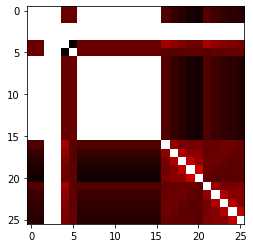

In [5]:
print(Xtrain.shape)
plt.imshow(np.corrcoef(Xtrain.transpose()), cmap='hot')
plt.show()

In [6]:
for i in range(Xtrain.shape[1]):
    print('i=' + repr(i) + ' has '+
         repr(np.count_nonzero(np.isnan(Xtrain[:,i]))) +
         ' nan values out of ' + repr(Xtrain.shape[0]))

i=0 has 0 nan values out of 592380
i=1 has 0 nan values out of 592380
i=2 has 172460 nan values out of 592380
i=3 has 172460 nan values out of 592380
i=4 has 0 nan values out of 592380
i=5 has 0 nan values out of 592380
i=6 has 0 nan values out of 592380
i=7 has 0 nan values out of 592380
i=8 has 0 nan values out of 592380
i=9 has 0 nan values out of 592380
i=10 has 0 nan values out of 592380
i=11 has 0 nan values out of 592380
i=12 has 0 nan values out of 592380
i=13 has 0 nan values out of 592380
i=14 has 0 nan values out of 592380
i=15 has 0 nan values out of 592380
i=16 has 0 nan values out of 592380
i=17 has 0 nan values out of 592380
i=18 has 0 nan values out of 592380
i=19 has 0 nan values out of 592380
i=20 has 0 nan values out of 592380
i=21 has 0 nan values out of 592380
i=22 has 0 nan values out of 592380
i=23 has 0 nan values out of 592380
i=24 has 0 nan values out of 592380
i=25 has 0 nan values out of 592380


In [7]:
Xtrain_tensor = torch.Tensor(Xtrain)
ytrain_tensor = torch.Tensor(ytrain)
train_dataset = torch.utils.data.TensorDataset(Xtrain_tensor, ytrain_tensor)

In [8]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

592380<class 'torch.Tensor'><class 'torch.Tensor'>


In [9]:
# blah = np.array(range(20)).reshape(20,1)
# # print(blah[:2*k] + blah[2*(k+1):])
# # print(blah[2*k:2*(k+1)])

# def kth_split(x, k, num_folds):
#     num_datapoints = len(x)
#     fold_size = math.floor(num_datapoints/num_folds)
#     print(x[:fold_size*k].shape)
#     if k == 0:
#         return x[fold_size*(k+1):], x[fold_size*k:fold_size*(k+1)]
#     elif k == num_folds-1:
#         return x[:fold_size*k], x[fold_size*k:fold_size*(k+1)]
#     else:
#         return np.vstack((x[:fold_size*k], x[fold_size*(k+1):])), x[fold_size*k:fold_size*(k+1)]

# def get_fold(num_folds, *args):
#     for k in range(num_folds):
#         retval = []
#         for i in range(len(args)):
#             retval += kth_split(args[i], k, num_folds)
#         yield retval

# for k in range(num_folds):
#     print(kth_split(blah, k, 10))

In [10]:
# Xtrain_tensor = torch.Tensor(Xtrain)
# ytrain_tensor = np.array(ytrain)

# for Xbuild, Xvalidate, ybuild, yvalidate in get_fold(10, Xtrain, ytrain):
#     print('blah')
#     build_dataset = torch.utils.data.TensorDataset(torch.Tensor(Xbuild), torch.Tensor(np.expand_dims(ybuild,1)))
#     print(len(build_dataset), type(build_dataset[0][0]), type(build_dataset[0][1]))

#     validate_dataset = torch.utils.data.TensorDataset(torch.Tensor(Xvalidate), torch.Tensor(yvalidate))
#     print(len(validate_dataset), type(validate_dataset[0][0]), type(validate_dataset[0][1]))

# num_datapoints = len(Xtrain)
# slice_idx = math.floor(num_datapoints/10)

# Xbuild = Xtrain[:slice_idx]
# Xvalidate = Xtrain[slice_idx:]
# ybuild = ytrain[:slice_idx]
# yvalidate = ytrain[slice_idx:]

# build_dataset = torch.utils.data.TensorDataset(torch.LongTensor(Xbuild), torch.LongTensor(ybuild))
# print(len(build_dataset), type(build_dataset[0][0]), type(build_dataset[0][1]))
# print(build_dataset[0][1].item())

# validate_dataset = torch.utils.data.TensorDataset(torch.LongTensor(Xvalidate), torch.LongTensor(yvalidate))
# print(len(validate_dataset), type(validate_dataset[0][0]), type(validate_dataset[0][1]))

In [11]:
# build_loader = torch.utils.data.DataLoader(build_dataset, batch_size=32, shuffle=True)
# validate_loader = torch.utils.data.DataLoader(validate_dataset, batch_size=32, shuffle=True)

In [12]:
# model.train()

# for epoch in range(1):
#     for batch_idx, (data, target) in enumerate(build_loader):
#         optimizer.zero_grad()
#         output = model(data)
#         loss = loss_fn(output, target)
#         loss.backward()
#         optimizer.step()

#     print('Train Epoch: %d Loss: %.4f' % (epoch+1, loss.item()))

In [13]:
# for data, target in zip(Xbuild, ybuild):
#     optimizer.zero_grad()
#     output = model((data))
#     loss = loss_fn(output, target)
#     loss.backward()
#     optimizer.step()

# print('Train Epoch: %d Loss: %.4f' % (epoch+1, loss.item()))
    

In [14]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y
        self.features = list(range(X.shape[1]))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx,self.features], self.y[idx]
        else:
            return self.X[idx, self.features], 

In [15]:
Xtrain_tensor = torch.FloatTensor(Xtrain[:1000])
ytrain_tensor = torch.FloatTensor(ytrain[:1000])

num_datapoints = len(Xtrain_tensor)
slice_idx = math.floor(num_datapoints/10)

train_dataset = MyDataset(Xtrain_tensor[slice_idx:,~np.isnan(sum(Xtrain))], ytrain_tensor[slice_idx:])
test_dataset = MyDataset(Xtrain_tensor[:slice_idx,~np.isnan(sum(Xtrain))], ytrain_tensor[:slice_idx])

print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))
print(len(test_dataset), type(test_dataset[0][0]), type(test_dataset[0][1]))

900<class 'torch.Tensor'><class 'torch.Tensor'>
100<class 'torch.Tensor'><class 'torch.Tensor'>


In [15]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

In [16]:
train_dataloader.__len__()

8

In [22]:
# Xtrain_tensor = torch.FloatTensor(Xtrain[:10000, ~np.isnan(sum(Xtrain))])
# ytrain_tensor = torch.FloatTensor(ytrain[:10000])


# feature_pool = list(range(24))
# features = []

# # features = list(range(23))
# # feature_pool = [23]

# while feature_pool:
#     pool_accuracies = []
#     pool_aucs = []
#     for f in feature_pool:
#         test_features = features.copy()
#         test_features.append(f)
#         print('Testing features ' + str(test_features))

#         num_datapoints = len(Xtrain_tensor)
#         slice_idx = math.floor(num_datapoints/10)

#         train_dataset = MyDataset(Xtrain_tensor[slice_idx:,test_features], ytrain_tensor[slice_idx:])
#         test_dataset = MyDataset(Xtrain_tensor[:slice_idx,test_features], ytrain_tensor[:slice_idx])

#         train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
#         test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

#         # Get a clean model
#         model = nn.Sequential(
#             nn.Flatten(),  
#             nn.Linear(len(test_features), 100),
#             nn.ReLU(),
#             nn.BatchNorm1d(100),
#             nn.Linear(100, 1),
#             nn.Sigmoid()
#         ).to(device)
#         # print(model)

#         optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
#         loss_fn = nn.MSELoss()

#         # Some layers, such as Dropout, behave differently during training
#         model.train()

#         for epoch in range(10):
#             for batch_idx, (data, target) in enumerate(train_dataloader):
#                 data = data.to(device)
#                 target = target.to(device)
#                 optimizer.zero_grad()# Erase accumulated gradients
#                 output = model(data)# Forward pass
#                 loss = loss_fn(output, target)# Calculate loss
#                 loss.backward()# Backward pass
#                 optimizer.step()# Weight update

#             # Track loss each epoch
#         print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))
            
#         # Putting layers like Dropout into evaluation mode
#         model.eval()

#         test_loss = 0
#         test_auc = 0
#         correct = 0

#         # Turning off automatic differentiation
#         with torch.no_grad():
#             for data, target in test_dataloader:
#                 data = data.to(device)
#                 target = target.to(device)
#                 output = model(data)
#                 test_loss += loss_fn(output, target).item()  # Sum up batch loss
#                 test_auc += sklearn.metrics.roc_auc_score(target.data.numpy(), output.data.numpy())
#                 pred = output.round()  # Get the index of the max class score
#                 correct += pred.eq(target.view_as(pred)).sum().item()

#         test_loss /= len(test_dataloader.dataset)
#         test_auc /= len(test_dataloader)

#         accuracy = 100. * correct / len(test_dataloader.dataset)
#         pool_accuracies.append(accuracy)
#         pool_aucs.append(test_auc)

#         print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f), AUC: %.4f' %
#                 (test_loss, correct, len(test_dataloader.dataset),
#                 accuracy, test_auc))

#     # Find the best feature
#     idx_best_feature = np.argmax(pool_aucs)
#     print('Best feature was ' + str(feature_pool[idx_best_feature]))
#     features.append(feature_pool[idx_best_feature])
#     print('New feature list is ' + str(features))
#     del feature_pool[idx_best_feature]
#     print('---------------------------------------------')

# print('done')

In [55]:
training_samples = math.floor(len(Xtrain)/1000)

Xtrain_tensor = torch.FloatTensor(Xtrain[:training_samples, ~np.isnan(sum(Xtrain))])
ytrain_tensor = torch.FloatTensor(ytrain[:training_samples])

test_features = range(24)
print('Testing features ' + str(test_features))

num_datapoints = len(Xtrain_tensor)
slice_idx = math.floor(num_datapoints/10)

train_dataset = MyDataset(Xtrain_tensor[slice_idx:,test_features], ytrain_tensor[slice_idx:])
test_dataset = MyDataset(Xtrain_tensor[:slice_idx,test_features], ytrain_tensor[:slice_idx])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

learning_rates = [1e-2, 1e-3, 1e-4]
layer_sizes = [[1000], [500, 500], [750,250],[250,750],[300, 600, 300],[150,600,450],[450,600,150],[150,900,150]]
eta = 1e-2

results = []

print('AUC         eta         layers')

for eta in learning_rates:
    # print('-------- eta = ' + str(eta) + ' --------')
    for layers in layer_sizes:
        # print('---- hiden layer sizes = ' + str(layers) + ' ----')
        torch.manual_seed(155)
        # Get a clean model
        modules = []
        modules.append(nn.Flatten())
        size_last = 24
        for i, layer in enumerate(layers):
            if isinstance(layers[i], numbers.Number):
                size_next = layers[i]
                modules.append(nn.Linear(size_last, size_next))
                modules.append(nn.ReLU())
                modules.append(nn.BatchNorm1d(size_next))
                size_last = size_next
            else:
                pass
        modules.append(nn.Linear(size_last, 1))

        model = nn.Sequential(*modules).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
        loss_fn = nn.MSELoss()

        # Some layers, such as Dropout, behave differently during training
        model.train()

        for epoch in range(1):
            i = 0
            for batch_idx, (data, target) in enumerate(train_dataloader):
                if i % (math.floor(100)) == 0:
                    # print('batch number = %i' % i)
                    pass
                i += 1
                data = data.to(device)
                target = target.to(device)
                optimizer.zero_grad()# Erase accumulated gradients
                output = model(data)# Forward pass
                loss = loss_fn(output, target)# Calculate loss
                loss.backward()# Backward pass
                optimizer.step()# Weight update

            # Track loss each epoch
            # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))
            
        # Putting layers like Dropout into evaluation mode
        model.eval()

        test_loss = 0
        test_auc = 0
        correct = 0

        # Turning off automatic differentiation
        with torch.no_grad():
            for data, target in test_dataloader:
                data = data.to(device)
                target = target.to(device)
                output = model(data)
                test_loss += loss_fn(output, target).item()  # Sum up batch loss
                test_auc += sklearn.metrics.roc_auc_score(target.data.numpy(), output.data.numpy())
                pred = output.round()  # Get the index of the max class score
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_dataloader.dataset)
        test_auc /= len(test_dataloader)

        accuracy = 100. * correct / len(test_dataloader.dataset)

        #print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f), AUC: %.4f' %
                # (test_loss, correct, len(test_dataloader.dataset),
                # accuracy, test_auc))

        print('%.4f      %.4f      %s' % (test_auc, eta, layers))

        results.append({'auc': test_auc, 'eta': eta, 'layers': layers})

# print(results)


Testing features range(0, 24)
AUC         eta         layers
0.6274      0.0100      [1000]
0.5488      0.0100      [500, 500]
0.4929      0.0100      [750, 250]
0.5190      0.0100      [250, 750]
0.4679      0.0100      [300, 600, 300]
0.3679      0.0100      [150, 600, 450]
0.4643      0.0100      [450, 600, 150]
0.3500      0.0100      [150, 900, 150]
0.3845      0.0010      [1000]
0.6333      0.0010      [500, 500]
0.6036      0.0010      [750, 250]
0.6143      0.0010      [250, 750]
0.3048      0.0010      [300, 600, 300]
0.3119      0.0010      [150, 600, 450]
0.4190      0.0010      [450, 600, 150]
0.5417      0.0010      [150, 900, 150]
0.3048      0.0001      [1000]
0.4964      0.0001      [500, 500]
0.3179      0.0001      [750, 250]
0.3774      0.0001      [250, 750]
0.4548      0.0001      [300, 600, 300]
0.5179      0.0001      [150, 600, 450]
0.6167      0.0001      [450, 600, 150]
0.6369      0.0001      [150, 900, 150]
